# Analysis Project: Morphology vs. Patch Duration

In [1]:
#Import necessary functions
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

#Makes a white backround with gray horizontal gridmarks at y-values
sns.set_style("whitegrid")

In [2]:
#ps = patch_seq csv file
ps = pd.read_csv("patch_seq_log_mouse.csv")

In [3]:
#list_initial = list with specific columns used from csv file
list_initial = ["Date", "User", "Rig #", "Morph", "Time spent extracting cytosol", "Time spent retracting pipette", 
                "patch duration", "PCR cycles", "SM_QC_PF", "Bad dates"]
ps = ps[list_initial]
ps.head()

,Date,User,Rig #,Morph,Time spent extracting cytosol,Time spent retracting pipette,patch duration,PCR cycles,SM_QC_PF,Bad dates
0,170104,P1,5,n,2.3,NaN,11.78333333,18.0,pass,x
1,170104,P1,5,n,2.316666667,NaN,12.21666667,18.0,pass,x
2,170104,P1,5,n,2.45,NaN,11.78333333,18.0,pass,x
3,170104,P1,5,n,2.316666667,NaN,12.45,18.0,pass,x
4,170104,P1,5,y,2.35,NaN,12.36666667,18.0,pass,x


### Categorizing & Filtering the columns

In [4]:
#Changing Date Format
ps["Date"] = pd.to_datetime(ps["Date"], format = "%y%m%d", errors = "coerce")

#Changing String to Numerical
ps["Time spent extracting cytosol"] = pd.to_numeric(ps["Time spent extracting cytosol"].str.replace(' ',''), errors ='coerce')
ps["patch duration"] = pd.to_numeric(ps["patch duration"].str.replace(' ',''), errors ='coerce')
ps["Time spent retracting pipette"] = pd.to_numeric(ps["Time spent retracting pipette"].str.replace(' ',''), errors ='coerce')

#Categories
ps["User"] = ps["User"].astype("category")
ps["Rig #"] = ps["Rig #"].astype("category")
ps["Morph"] = ps["Morph"].astype("category")
ps["PCR cycles"] = ps["PCR cycles"].astype("category")
ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")
ps["Bad dates"] = ps["Bad dates"].astype("category")

#Filtering Columns
ps = ps[ps["PCR cycles"] == 21]      #Shows 21 pcr cycles
ps = ps[ps["SM_QC_PF"] != "cnt"]     #Shows everything except (cnt = control)
ps = ps[ps["Bad dates"] != "x"]      #Shows everthing except (x = contaminated)
ps = ps[ps["Time spent extracting cytosol"] <= 10]

#Dropping blank columns
ps = ps.drop("Bad dates", 1)
ps["Time spent retracting pipette"] = ps["Time spent retracting pipette"].fillna(0)
ps.dropna(subset = ["User", "Morph", "Time spent extracting cytosol", "Time spent retracting pipette", "patch duration", 
                    "SM_QC_PF"], inplace = True)
ps.head()

,Date,User,Rig #,Morph,Time spent extracting cytosol,Time spent retracting pipette,patch duration,PCR cycles,SM_QC_PF
1634,2017-04-19,P2,6,n,1.800000,0.0,4.333333,21.0,fail
1635,2017-04-19,P2,6,y,1.666667,0.0,6.566667,21.0,pass
1636,2017-04-19,P2,6,n,1.433333,0.0,8.033333,21.0,fail
1637,2017-04-19,P2,6,y,2.350000,0.0,7.416667,21.0,pass
1638,2017-04-19,P2,6,y,2.216667,0.0,4.166667,21.0,pass


## Creating Recording Duration Column

In [5]:
ps["Recording Duration"] = ps["patch duration"] - ps["Time spent extracting cytosol"] - ps["Time spent retracting pipette"]
ps = ps[ps["Recording Duration"] > 0] #Only shows postive values
ps.head()

,Date,User,Rig #,Morph,Time spent extracting cytosol,Time spent retracting pipette,patch duration,PCR cycles,SM_QC_PF,Recording Duration
1634,2017-04-19,P2,6,n,1.800000,0.0,4.333333,21.0,fail,2.533333
1635,2017-04-19,P2,6,y,1.666667,0.0,6.566667,21.0,pass,4.900000
1636,2017-04-19,P2,6,n,1.433333,0.0,8.033333,21.0,fail,6.600000
1637,2017-04-19,P2,6,y,2.350000,0.0,7.416667,21.0,pass,5.066667
1638,2017-04-19,P2,6,y,2.216667,0.0,4.166667,21.0,pass,1.950000


In [6]:
ps.tail()

,Date,User,Rig #,Morph,Time spent extracting cytosol,Time spent retracting pipette,patch duration,PCR cycles,SM_QC_PF,Recording Duration
4893,2017-12-15,PB,3,n,1.233333,0.000000,5.166667,21.0,pass,3.933333
4894,2017-12-15,P6,2,check with aaron,1.233333,2.366667,6.416667,21.0,pass,2.816667
4895,2017-12-15,P6,2,y,1.316667,2.100000,6.866667,21.0,fail,3.450000
4896,2017-12-15,P6,2,n,1.083333,2.616667,7.033333,21.0,pass,3.333333
4897,2017-12-15,P6,2,y,1.400000,1.650000,7.400000,21.0,pass,4.350000


## Renaming columns

In [7]:
#Renaming Duration Columns
ps.rename(columns = {"Time spent extracting cytosol" : "Extraction Duration", 
                     "Time spent retracting pipette" : "Retraction Duration",
                     "patch duration" : "Patch Duration"}, inplace = True)

In [8]:
#Renaming Morphological Calls
ps.Morph.cat.rename_categories({"n" : "No Fill", 
                                "y" : "Good Fill", 
                                "q" : "Questionable Fill"}, inplace = True)
ps.head()

,Date,User,Rig #,Morph,Extraction Duration,Retraction Duration,Patch Duration,PCR cycles,SM_QC_PF,Recording Duration
1634,2017-04-19,P2,6,No Fill,1.800000,0.0,4.333333,21.0,fail,2.533333
1635,2017-04-19,P2,6,Good Fill,1.666667,0.0,6.566667,21.0,pass,4.900000
1636,2017-04-19,P2,6,No Fill,1.433333,0.0,8.033333,21.0,fail,6.600000
1637,2017-04-19,P2,6,Good Fill,2.350000,0.0,7.416667,21.0,pass,5.066667
1638,2017-04-19,P2,6,Good Fill,2.216667,0.0,4.166667,21.0,pass,1.950000


## Info

In [9]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 1634 to 4897
Data columns (total 10 columns):
Date                   2098 non-null datetime64[ns]
User                   2098 non-null category
Rig #                  2086 non-null category
Morph                  2098 non-null category
Extraction Duration    2098 non-null float64
Retraction Duration    2098 non-null float64
Patch Duration         2098 non-null float64
PCR cycles             2098 non-null category
SM_QC_PF               2098 non-null category
Recording Duration     2098 non-null float64
dtypes: category(5), datetime64[ns](1), float64(4)
memory usage: 110.0 KB


In [10]:
ps.Morph.value_counts()

No Fill              1182
Good Fill             491
Questionable Fill     348
na                     59
processing             10
z                       4
?                       2
t                       1
check with aaron        1
                        0
Name: Morph, dtype: int64

In [11]:
ps.User.value_counts()

P2    566
P8    542
P1    488
P9    213
PB    115
P6     88
PA     81
P5      5
P3      0
P0      0
Name: User, dtype: int64

## Date for this Dataset

In [12]:
ps.head()

,Date,User,Rig #,Morph,Extraction Duration,Retraction Duration,Patch Duration,PCR cycles,SM_QC_PF,Recording Duration
1634,2017-04-19,P2,6,No Fill,1.800000,0.0,4.333333,21.0,fail,2.533333
1635,2017-04-19,P2,6,Good Fill,1.666667,0.0,6.566667,21.0,pass,4.900000
1636,2017-04-19,P2,6,No Fill,1.433333,0.0,8.033333,21.0,fail,6.600000
1637,2017-04-19,P2,6,Good Fill,2.350000,0.0,7.416667,21.0,pass,5.066667
1638,2017-04-19,P2,6,Good Fill,2.216667,0.0,4.166667,21.0,pass,1.950000


In [13]:
ps.tail()

,Date,User,Rig #,Morph,Extraction Duration,Retraction Duration,Patch Duration,PCR cycles,SM_QC_PF,Recording Duration
4893,2017-12-15,PB,3,No Fill,1.233333,0.000000,5.166667,21.0,pass,3.933333
4894,2017-12-15,P6,2,check with aaron,1.233333,2.366667,6.416667,21.0,pass,2.816667
4895,2017-12-15,P6,2,Good Fill,1.316667,2.100000,6.866667,21.0,fail,3.450000
4896,2017-12-15,P6,2,No Fill,1.083333,2.616667,7.033333,21.0,pass,3.333333
4897,2017-12-15,P6,2,Good Fill,1.400000,1.650000,7.400000,21.0,pass,4.350000


## Swarmplot, Violinplot & Boxplot of Patch Duration vs. Morphological Calls

In [14]:
#Data: 4/19/2017 - 12/15/2017

Text(0,0.5,u'Patch Duration (min)')

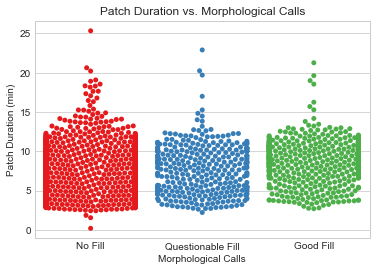

In [15]:
sp = sns.swarmplot(x = "Morph", 
                   y = "Patch Duration", 
                   data = ps, 
                   order = ["No Fill", "Questionable Fill", "Good Fill"],
                   palette = "Set1").set_title("Patch Duration vs. Morphological Calls")
plt.xlabel("Morphological Calls")
plt.ylabel("Patch Duration (min)")

Text(0,0.5,u'Patch Duration (min)')

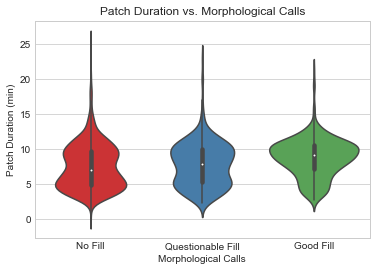

In [16]:
vp = sns.violinplot(x = "Morph", 
                    y = "Patch Duration", 
                    data = ps, 
                    order = ["No Fill", "Questionable Fill", "Good Fill"],
                    palette = "Set1").set_title("Patch Duration vs. Morphological Calls")
plt.xlabel("Morphological Calls")
plt.ylabel("Patch Duration (min)")

Text(0,0.5,u'Patch Duration (min)')

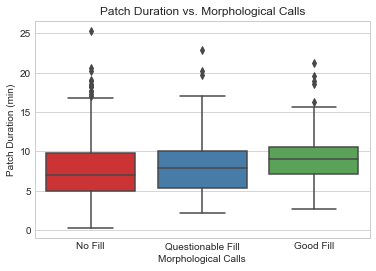

In [17]:
bp = sns.boxplot(x = "Morph", 
                 y = "Patch Duration", 
                 data = ps, 
                 order = ["No Fill", "Questionable Fill", "Good Fill"],
                 palette = "Set1").set_title("Patch Duration vs. Morphological Calls")
plt.xlabel("Morphological Calls")
plt.ylabel("Patch Duration (min)")

## Swarmplot, Violinplot & Boxplot of Patch Duration vs. Morphological Calls per User

In [18]:
#Data: 4/19/2017 - 12/15/2017

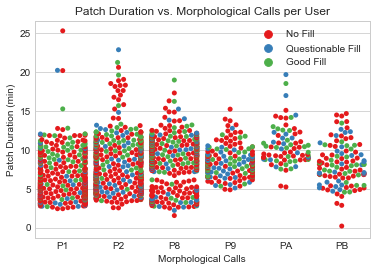

In [19]:
sp = sns.swarmplot(x = "User", 
                   y = "Patch Duration", 
                   hue = "Morph", 
                   data = ps, 
                   order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                   hue_order = ["No Fill", "Questionable Fill", "Good Fill"],
                   palette = "Set1").set_title("Patch Duration vs. Morphological Calls per User")
plt.xlabel("Morphological Calls")
plt.ylabel("Patch Duration (min)")
plt.legend(loc = "upper right")

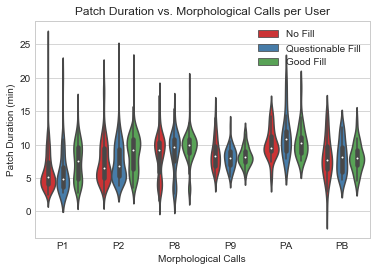

In [20]:
vp = sns.violinplot(x = "User", 
                    y = "Patch Duration", 
                    hue = "Morph", 
                    data = ps, 
                    order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                    hue_order = ["No Fill", "Questionable Fill", "Good Fill"],
                    palette = "Set1").set_title("Patch Duration vs. Morphological Calls per User")
plt.xlabel("Morphological Calls")
plt.ylabel("Patch Duration (min)")
plt.legend(loc = "upper right")

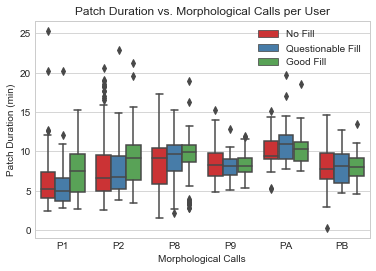

In [21]:
bp = sns.boxplot(x = "User", 
                 y = "Patch Duration", 
                 hue = "Morph", 
                 data = ps, 
                 order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                 hue_order = ["No Fill", "Questionable Fill", "Good Fill"],
                 palette = "Set1").set_title("Patch Duration vs. Morphological Calls per User")
plt.xlabel("Morphological Calls")
plt.ylabel("Patch Duration (min)")
plt.legend(loc = "upper right")
plt.savefig("box_patch_duration_vs_morph_user")